In [ ]:
# Pasi:
#DONE   1) Incarcam imaginile
#       a) Suffle the images
#       b) impartim imaginile in train si test
#DONE   2) Preprocesare
#          a) standardizam imaginile (dimensiune, rotatie, etc)
#          b) redimensionam imaginile
#          c) Spatiul de culori standardizat
#          d) Cropuirea mainii
#   3) Augumentarea bazei de date (Nu facem in lab dar putem discuta metode)
#   4) Extragere de trasaturi
#   5) Clasificator
#   6) Testare (PR, Confusion Matrix, etc)

In [ ]:
#Laborator 1

In [1]:
import sklearn as sk
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt


In [2]:

base_path = 'Images/' # fiecare schimba cu path in drive
file_path_arr = []
for i in range(4):
  file_path_arr.append(glob.glob(base_path+str(i)+'/*.jpg'))
print(file_path_arr)

[['Images/0\\0.jpg', 'Images/0\\1.jpg', 'Images/0\\2.jpg', 'Images/0\\3.jpg', 'Images/0\\4.jpg', 'Images/0\\5.jpg', 'Images/0\\6.jpg', 'Images/0\\7.jpg', 'Images/0\\8.jpg', 'Images/0\\9.jpg'], ['Images/1\\0.jpg', 'Images/1\\1.jpg', 'Images/1\\2.jpg', 'Images/1\\3.jpg', 'Images/1\\4.jpg', 'Images/1\\5.jpg', 'Images/1\\6.jpg', 'Images/1\\7.jpg', 'Images/1\\8.jpg', 'Images/1\\9.jpg'], ['Images/2\\0.jpg', 'Images/2\\1.jpg', 'Images/2\\2.jpg', 'Images/2\\3.jpg', 'Images/2\\4.jpg', 'Images/2\\5.jpg', 'Images/2\\6.jpg', 'Images/2\\7.jpg', 'Images/2\\8.jpg', 'Images/2\\9.jpg'], ['Images/3\\0.jpg', 'Images/3\\1.jpg', 'Images/3\\2.jpg', 'Images/3\\3.jpg', 'Images/3\\4.jpg', 'Images/3\\5.jpg', 'Images/3\\6.jpg', 'Images/3\\7.jpg', 'Images/3\\8.jpg', 'Images/3\\9.jpg']]


In [3]:
random.seed(42)
image_index_arr = random.sample(range(0,9), 7)
print(image_index_arr)

[1, 0, 5, 2, 8, 4, 7]


In [4]:
train_image_paths = []
test_image_path = []
for pths in file_path_arr:
  tmp_train = []
  tmp_test = []
  for i in range(10):
    if i in image_index_arr:
      tmp_train.append(pths[i])
    else:
      tmp_test.append(pths[i])
  train_image_paths.append(tmp_train)
  test_image_path.append(tmp_test)

print(test_image_path)
print(np.shape(train_image_paths))
print(np.shape(test_image_path))

[['Images/0\\3.jpg', 'Images/0\\6.jpg', 'Images/0\\9.jpg'], ['Images/1\\3.jpg', 'Images/1\\6.jpg', 'Images/1\\9.jpg'], ['Images/2\\3.jpg', 'Images/2\\6.jpg', 'Images/2\\9.jpg'], ['Images/3\\3.jpg', 'Images/3\\6.jpg', 'Images/3\\9.jpg']]
(4, 7)
(4, 3)


In [5]:
train_images = []
test_images = []

for cls in train_image_paths:
  t = []
  for element in cls:
    t.append(cv2.imread(element))
  train_images.append(t)

for cls in test_image_path:
  t = []
  for element in cls:
    t.append(cv2.imread(element))
  test_images.append(t)

print(np.shape(train_images))
# nr clase, exemple per calsa, height, width, chanels

(4, 7, 4032, 1908, 3)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x20ea43d9df0>)

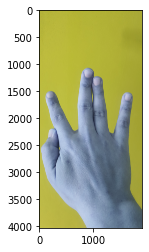

In [6]:
plt.figure(), plt.imshow(train_images[0][0])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x20edfe255b0>)

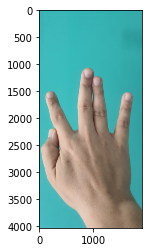

In [7]:
im = train_images[0][0]
img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img_rgb)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x20ee2ac2280>)

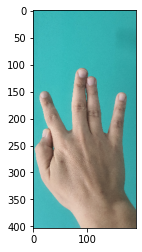

In [8]:
w ,h,_ = np.shape(img_rgb)
scale_dw = 10
im_resized = cv2.resize(img_rgb, ( int(h/scale_dw), int(w/scale_dw)))
plt.figure(), plt.imshow(im_resized)

In [9]:
#Laborator 2

In [10]:

def binarizare(img):

    R = img[:, :, 0]
    G = img[: ,:, 1]
    B = img[:, :, 2]

    C1 = np.zeros((img.shape[0], img.shape[1]))
    C2 = np.zeros((img.shape[0], img.shape[1]))
    C3 = np.zeros((img.shape[0], img.shape[1]))
    C4 = np.zeros((img.shape[0], img.shape[1]))
    C5 = np.zeros((img.shape[0], img.shape[1]))
    C6 = np.zeros((img.shape[0], img.shape[1]))
    C7 = np.zeros((img.shape[0], img.shape[1]))
    rez = np.zeros((img.shape[0], img.shape[1]))

    C1[np.logical_and(R > 95, G > 40, B > 20)] = 1
    C2[(np.maximum(np.maximum(R, G), B) - np.minimum(np.minimum(R, G), B)) > 15] = 1
    C3[np.absolute(R - G) > 15] = 1
    C4[np.logical_and(R > G, R > B)] = 1

    C5[np.logical_and(R > 220, G > 210, B > 170)] = 1
    C6[np.absolute(R - G) <= 15] = 1
    C7[np.logical_and(R > B, G > B)] = 1


    caz1 = np.logical_and(np.logical_and(C1 == 1, C2 == 1, C3 == 1), C4 == 1)
    caz2 = np.logical_and(C5 ==1, C6 == 1, C7 == 1)

    rez[np.logical_or(caz1 == 1, caz2 == 1)] = 1
    
    return rez

In [11]:

def afla_bounding_box(contours):
    arie_max = 0
    contur_max = None
    for contur in contours:
        tmp = cv2.boundingRect(contur)
    #     print(tmp)
        arie = tmp[2] * tmp[3]
        if arie > arie_max:
            contur_max = tmp
            arie_max = arie
    return contur_max

In [12]:

#2 Preprocesare
train_images_procesate = []
test_images_procesate = []

for classes in train_images:
    t = []
    for images in classes:
        img_rgb = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
        
        w ,h,_ = np.shape(img_rgb)
        scale_dw = 10
        im_resized = cv2.resize(img_rgb, ( int(h/scale_dw), int(w/scale_dw)))
        
        rez = binarizare(im_resized)
        contours, hierarchy = cv2.findContours(rez.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contur_max = afla_bounding_box(contours)
        
        rez = rez[contur_max[1]: contur_max[1]+contur_max[3],contur_max[0]: contur_max[0] + contur_max[2]]
        im_resized = im_resized[contur_max[1]: contur_max[1]+contur_max[3],contur_max[0]: contur_max[0] + contur_max[2]]
        
        im_resized[rez==0] = 0
        im_resized_1 = cv2.resize(im_resized, (64, 128))
        t.append(im_resized_1)
        
    train_images_procesate.append(t)
    
    

    
for classes in test_images:
    t = []
    for images in classes:
        img_rgb = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
        
        w ,h,_ = np.shape(img_rgb)
        scale_dw = 10
        im_resized = cv2.resize(img_rgb, ( int(h/scale_dw), int(w/scale_dw)))
        
        rez = binarizare(im_resized)
        contours, hierarchy = cv2.findContours(rez.astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        contur_max = afla_bounding_box(contours)
        
        rez = rez[contur_max[1]: contur_max[1]+contur_max[3],contur_max[0]: contur_max[0] + contur_max[2]]
        im_resized = im_resized[contur_max[1]: contur_max[1]+contur_max[3],contur_max[0]: contur_max[0] + contur_max[2]]
        
        im_resized[rez==0] = 0
        im_resized_1 = cv2.resize(im_resized, (64, 128))
        t.append(im_resized_1)
        
    test_images_procesate.append(t)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x20ee2b210a0>)

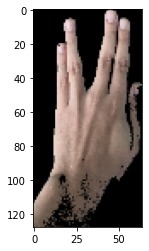

In [13]:
plt.figure(), plt.imshow(test_images_procesate[1][0], cmap = "gray")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x20edfe81fa0>)

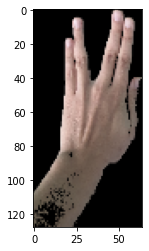

In [14]:
plt.figure(), plt.imshow(train_images_procesate[1][0], cmap = "gray")

In [15]:
# 4 Extragere de trasaturi   train_images_procesate    test_images_procesate

In [16]:
image = train_images_procesate[1][0]


winSize = (32,32)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64


hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                            histogramNormType,L2HysThreshold,gammaCorrection,nlevels)

    #compute(img[, winStride[, padding[, locations]]]) -> descriptors

winStride = (8,8)
padding = (8,8)
locations = ((10,20),)

train_features = []
test_features = []

train_labels = []
test_labels = []

index_clasa = -1
for clasa in train_images_procesate:
    index_clasa = index_clasa+1
    for image in clasa:
        hist = hog.compute(image,winStride,padding,locations)

        train_features.append(hist)
        train_labels.append(index_clasa)
        
        
index_clasa = -1
for clasa in test_images_procesate:
    index_clasa = index_clasa+1
    for image in clasa:
        hist = hog.compute(image,winStride,padding,locations)

        test_features.append(hist)
        test_labels.append(index_clasa)

In [17]:
train_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [18]:
# 5. Clasificator

In [19]:
knn = cv2.ml.KNearest_create()

data = np.float32(train_features)
labels = np.float32(train_features)

knn.train(data,cv2.ml.ROW_SAMPLE,labels)

True

In [20]:
test = np.float32(test_features)
labels_test = np.float32(test_features)


ll = np.shape(data[10])[0]
tst = data[10].reshape(1,ll)

knn.findNearest(tst, 3)

(0.0,
 array([[0.]], dtype=float32),
 array([[0.        , 0.4185693 , 0.17967595]], dtype=float32),
 array([[0.       , 1.6076695, 1.7496717]], dtype=float32))

In [21]:
svm = cv2.ml.SVM_create()

svm.setType(cv2.ml.SVM_C_SVC)

svm.setKernel(cv2.ml.SVM_LINEAR)
labels = np.int32(labels)

svm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER,100, 1e-6))
svm.train(data,cv2.ml.ROW_SAMPLE,np.int32(train_labels))


True

In [22]:
svm.predict(tst)

(0.0, array([[1.]], dtype=float32))